This is the Project notebook


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# import plotly as ply
%matplotlib inline
from pylab import rcParams

from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
apps = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep = ',')
apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
#displaying types of columns
apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
#displaying number of entries (rows)
apps.size

140933

In [6]:
#displaying unique entries
apps['App'].unique

<bound method Series.unique of 0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
5                               Paper flowers instructions
6                  Smoke Effect Photo Maker - Smoke Editor
7                                         Infinite Painter
8                                     Garden Coloring Book
9                            Kids Paint Free - Drawing Fun
10                                 Text on Photo - Fonteee
11                 Name Art Photo Editor - Focus n Filters
12                          Tattoo Name On My Photo Editor
13                                   Mandala Coloring Book
14         3D Color Pixel by Number - Sandbox Art Coloring
15                         Learn To Draw Kawaii Characters
16            Photo Desig

In [7]:
#removing duplicates
apps.drop_duplicates()
apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [8]:
#displaying new app entries number
apps.size

140933

In [10]:
#missing data
total = apps.isnull().sum().sort_values(ascending=False)
percent = (apps.isnull().sum()/apps.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [11]:
#rows and columns
print(apps.shape)

(10841, 13)


In [12]:
df=apps
df.Installs = df.Installs.replace("Free", 0)
df.dropna(how ='any', inplace = True)
df.Installs = df.Installs.astype(str)
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [13]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
df.Size = df.Size.apply(lambda x: x/(10**6))
df.rename(columns={'Size': 'Size(in MB)'}, inplace=True)

In [14]:
df.Category = df.Category.apply(lambda x: x.replace('_',' '))
df.Price = df.Price.apply(lambda x: x.replace('$',''))
df.rename(columns={'Price': 'Price(in $)'}, inplace=True)

In [14]:
df.head(10)

,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price(in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART AND DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART AND DESIGN,3.8,178,19.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART AND DESIGN,4.1,36815,29.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART AND DESIGN,4.4,13791,33.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART AND DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [15]:
apps = df

### Analysis

In [16]:
apps.head(5)

,App,Category,Rating,Reviews,Size(in MB),Installs,Type,Price(in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
print("There are" , len(apps['Category'].unique()) , "current categories for applications")

print("\n", apps['Category'].unique())

There are 33 current categories for applications

 ['ART AND DESIGN' 'AUTO AND VEHICLES' 'BEAUTY' 'BOOKS AND REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD AND DRINK' 'HEALTH AND FITNESS' 'HOUSE AND HOME'
 'LIBRARIES AND DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL AND LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO PLAYERS'
 'NEWS AND MAGAZINES' 'MAPS AND NAVIGATION']


Text(0.5, 1.0, 'TOTAL apps in each category')

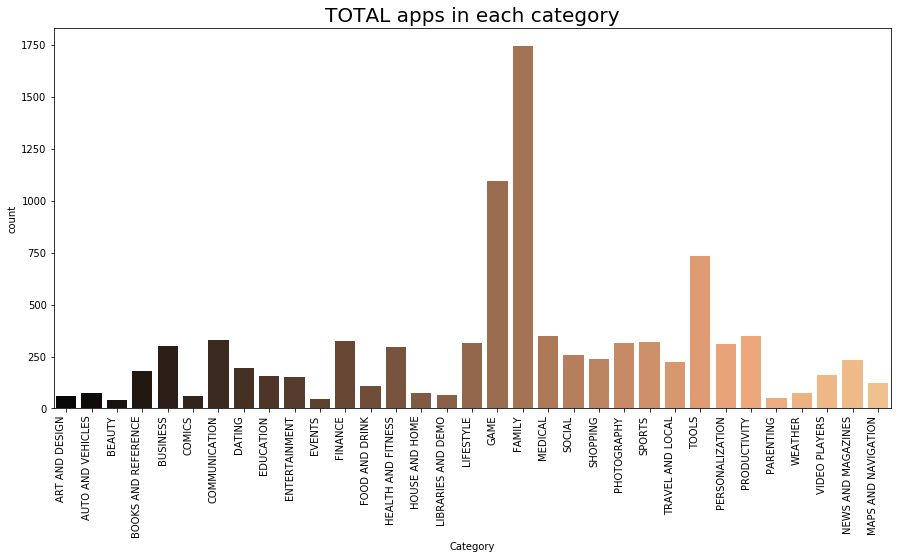

In [18]:
rcParams['figure.figsize'] = 15,7
category_plot = sb.countplot(x="Category",data=apps, palette = "copper")
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=90, ha="right")
category_plot 
plt.title('TOTAL apps in each category',size = 20)

Text(0.5, 1.0, 'Distribution of Rating')

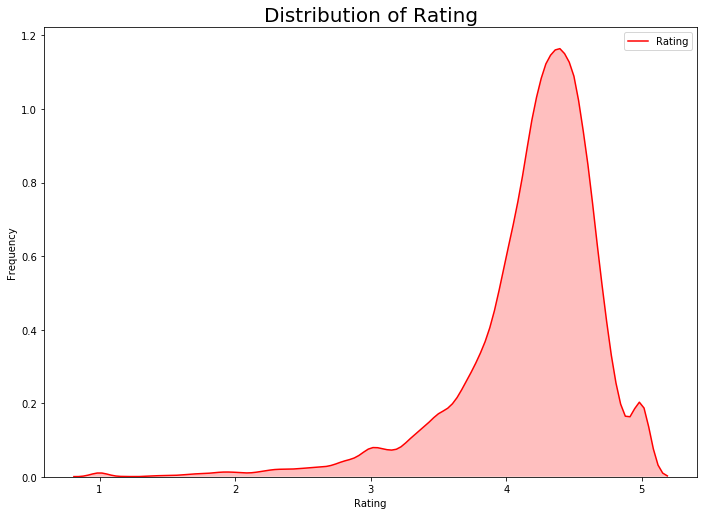

In [18]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sb.kdeplot(apps.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [19]:
#Changing graph style
style = sb.color_palette("ch:2.5,-.2,dark=.3")

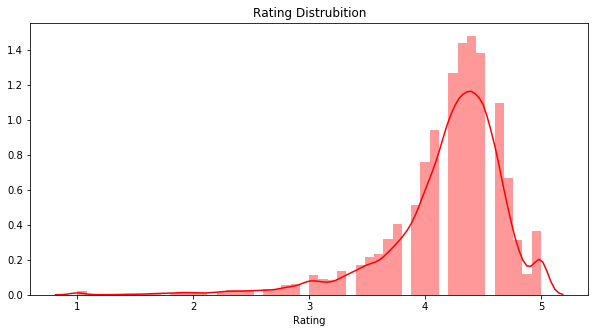

In [20]:
#histogram
plt.figure(figsize=(10,5))
sb.distplot(apps['Rating'],color='r');
plt.title("Rating Distrubition")
plt.show()

In [25]:
# Left intentionally blank

Text(0.5, 1.0, 'Content Rating distribution')

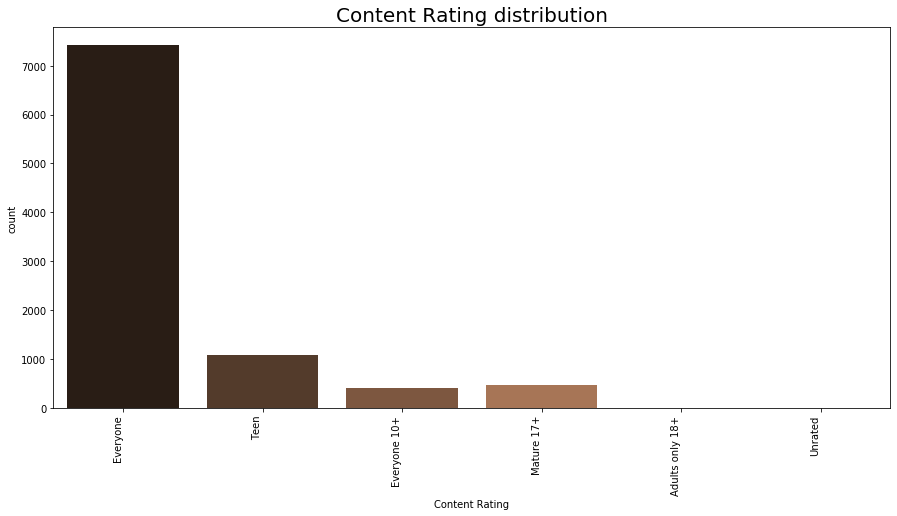

In [21]:
rcParams['figure.figsize'] = 15,7
content_plot = sb.countplot(x="Content Rating",data=apps, palette = "copper")
content_plot.set_xticklabels(content_plot.get_xticklabels(), rotation=90, ha="right")
content_plot 
plt.title('Content Rating distribution',size = 20)

Text(0.5, 1.0, 'Number of Free Apps vs Paid Apps')

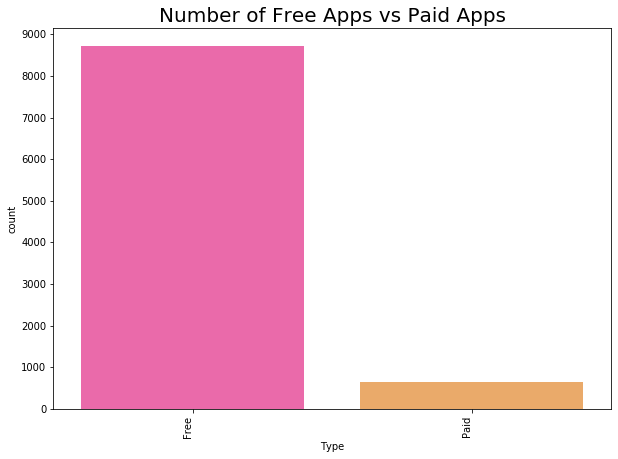

In [22]:
rcParams['figure.figsize'] = 10,7
type_plot = sb.countplot(x="Type", data=apps, palette = "spring")
type_plot.set_xticklabels(type_plot.get_xticklabels(), rotation=90, ha="right")
arrayss=list(range(10))
nums = np.array(arrayss) *1000
nums.tolist()
plt.yticks(nums)
type_plot 
plt.title('Number of Free Apps vs Paid Apps',size = 20)

Text(0.5, 1.0, 'Size Range for free and paid Apps')

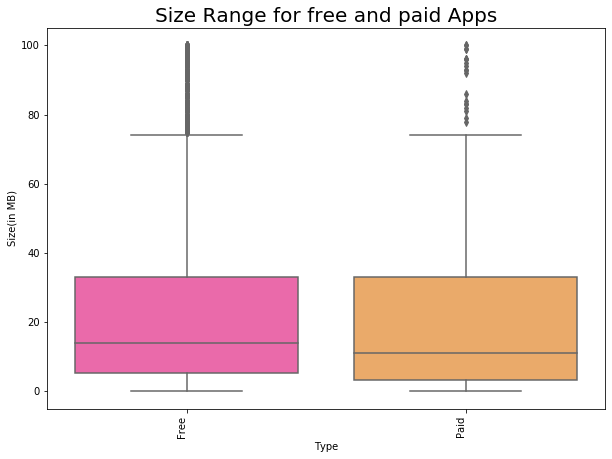

In [23]:
rcParams['figure.figsize'] = 10,7
type_size = sb.boxplot(x="Type",y="Size(in MB)", data=apps, palette = "spring")
type_size.set_xticklabels(type_size.get_xticklabels(), rotation=90, ha="right")
# arrayss=list(range(100))
# nums = np.array(arrayss) *1
# nums.tolist()
# plt.yticks(nums)
type_size 
plt.title('Size Range for free and paid Apps',size = 20)

Text(0.5, 1.0, 'Top Categories for Free Apps')

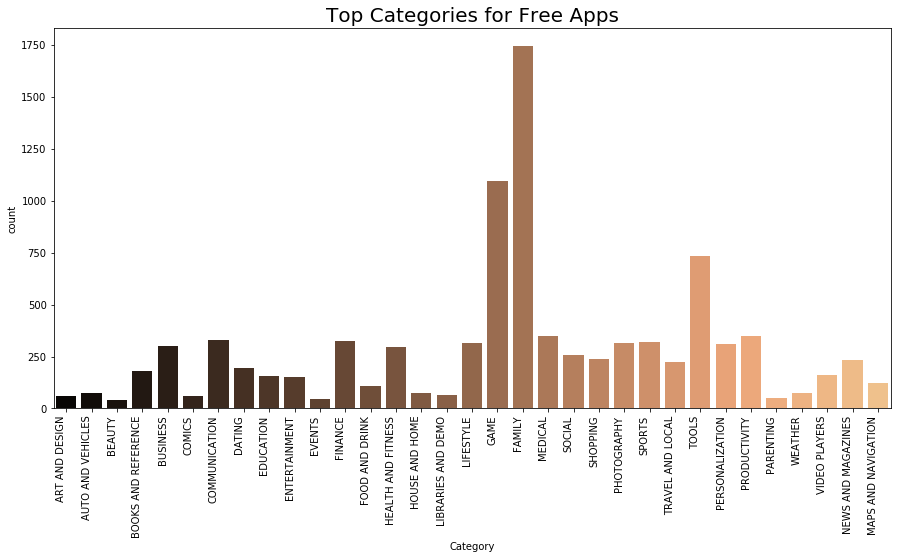

In [24]:
rcParams['figure.figsize'] = 15,7
free_categories = sb.countplot(x="Category",data=apps, palette = "copper")
free_categories.set_xticklabels(free_categories.get_xticklabels(), rotation=90, ha="right")
free_categories 
plt.title('Top Categories for Free Apps',size = 20)

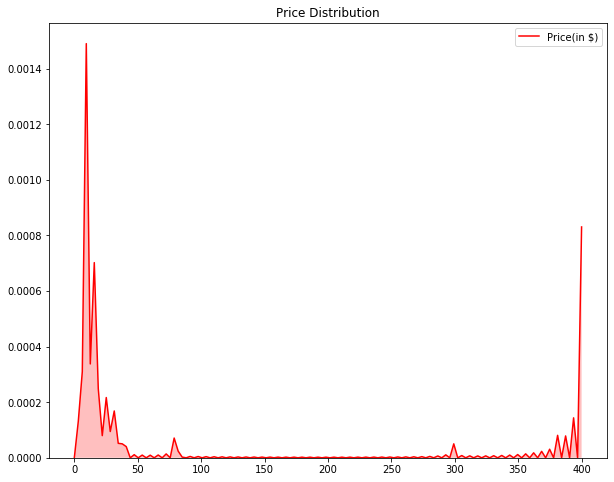

In [28]:
plt.figure(figsize=(10,8))
sb.kdeplot(apps["Price(in $)"], shade=True,color='red')
plt.title("Price Distribution")
plt.show()

In [ ]:
#Calculate correlation matrices between
# Rating vs. No. of reviews
# Rating vs. Category
# Rating vs. Size
# Rating vs. Type


In [27]:
#Checking contengency table
contengency_table = pd.crosstab(apps["Rating"],apps["Size(in MB)"], margins= True)
# contengency_table

#Plotting scatter plot of correlation
# plt.scatter(apps["Rating"], apps["Size(in MB)"])
# plt.xlim(0, 5); plt.ylim(-1, 105)

# Getting the correlation between the 2 columns
df = pd.DataFrame(data=apps,columns=['Rating', 'Size(in MB)'])
tmp=df.corr()
print(tmp["Rating"]["Size(in MB)"])
rating_size_index = tmp["Rating"]["Size(in MB)"]

0.08374977514110087


In [28]:

#Checking contengency table
contengency_table = pd.crosstab(apps["Rating"],apps["Category"], margins= True)
# contengency_table

#Plotting scatter plot of correlation
# plt.scatter(apps["Rating"], apps["Category"])
# plt.xlim(0.0, 5.1); plt.ylim(-1,34 )

# Getting the correlation between the 2 columns
df = pd.DataFrame(data=apps,columns=['Rating', 'Category'])
tmp=df.corr()
tmp
#Correlation is equal to one so correlation test fails 


,Rating
Rating,1.0


In [ ]:
#Checking contengency table
# contengency_table = pd.crosstab(apps["Rating"],apps["Reviews"], margins= True)
# contengency_table

#Plotting scatter plot of correlation
plt.scatter(apps["Rating"], apps["Reviews"])
plt.xlim(0, 5); plt.ylim(-1, 1000)
plt.show
# Getting the correlation between the 2 columns
# df = pd.DataFrame(data=apps,columns=['Rating', 'Size(in MB)'])
# tmp=df.corr()
# print(tmp["Rating"]["Size(in MB)"])
# rating_size_index = tmp["Rating"]["Size(in MB)"]